In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import seaborn as sb


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prosper Loan Data Exploaration by Merri Nalbandyan

## Data wrangling and cleaning

What factors affect loan’s amount ?


In [0]:
df=pd.read_csv('prosperLoanData.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
#check for null values
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

ListingKey , 0
ListingNumber , 0
ListingCreationDate , 0
CreditGrade , 84984
Term , 0
LoanStatus , 0
ClosedDate , 58848
BorrowerAPR , 25
BorrowerRate , 0
LenderYield , 0
EstimatedEffectiveYield , 29084
EstimatedLoss , 29084
EstimatedReturn , 29084
ProsperRating (numeric) , 29084
ProsperRating (Alpha) , 29084
ProsperScore , 29084
ListingCategory (numeric) , 0
BorrowerState , 5515
Occupation , 3588
EmploymentStatus , 2255
EmploymentStatusDuration , 7625
IsBorrowerHomeowner , 0
CurrentlyInGroup , 0
GroupKey , 100596
DateCreditPulled , 0
CreditScoreRangeLower , 591
CreditScoreRangeUpper , 591
FirstRecordedCreditLine , 697
CurrentCreditLines , 7604
OpenCreditLines , 7604
TotalCreditLinespast7years , 697
OpenRevolvingAccounts , 0
OpenRevolvingMonthlyPayment , 0
InquiriesLast6Months , 697
TotalInquiries , 1159
CurrentDelinquencies , 697
AmountDelinquent , 7622
DelinquenciesLast7Years , 990
PublicRecordsLast10Years , 697
PublicRecordsLast12Months , 7604
RevolvingCreditBalance , 7604
BankcardUt

I want to know what factors affect a loan’s outcome status. For that my target variable will be LoanStatus.  For this I do not want to choose the variables randomly. I wanto apply a correlation and choose the variables that best desribe it. 

In [0]:
loan_data=df[['BorrowerAPR','LoanStatus','BorrowerRate','AvailableBankcardCredit','LoanOriginalAmount','Investors','Occupation',
         'EmploymentStatus','EmploymentStatusDuration','ProsperRating (numeric)','ProsperRating (Alpha)',
         "Term",'Recommendations',"IncomeRange",'MonthlyLoanPayment','ListingCreationDate','ClosedDate','DebtToIncomeRatio']]

In [11]:
loan_data.isnull().sum() 

BorrowerAPR                    25
LoanStatus                      0
BorrowerRate                    0
AvailableBankcardCredit      7544
LoanOriginalAmount              0
Investors                       0
Occupation                   3588
EmploymentStatus             2255
EmploymentStatusDuration     7625
ProsperRating (numeric)     29084
ProsperRating (Alpha)       29084
Term                            0
Recommendations                 0
IncomeRange                     0
MonthlyLoanPayment              0
ListingCreationDate             0
ClosedDate                  58848
DebtToIncomeRatio            8554
dtype: int64

In [12]:
#check for duplicate values
sum(loan_data.duplicated())

871

In [13]:
loan_data.shape

(113937, 18)

In [14]:
loan_data

BorrowerAPR  ... DebtToIncomeRatio
0           0.16516  ...              0.17
1           0.12016  ...              0.18
2           0.28269  ...              0.06
3           0.12528  ...              0.15
4           0.24614  ...              0.26
...             ...  ...               ...
113932      0.22354  ...              0.13
113933      0.13220  ...              0.11
113934      0.23984  ...              0.51
113935      0.28408  ...              0.48
113936      0.13189  ...              0.23

[113937 rows x 18 columns]

In [0]:
loan_data=loan_data.dropna(subset=['BorrowerAPR'])

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BorrowerAPR               113912 non-null  float64
 1   LoanStatus                113912 non-null  object 
 2   BorrowerRate              113912 non-null  float64
 3   AvailableBankcardCredit   106393 non-null  float64
 4   LoanOriginalAmount        113912 non-null  int64  
 5   Investors                 113912 non-null  int64  
 6   Occupation                110349 non-null  object 
 7   EmploymentStatus          111682 non-null  object 
 8   EmploymentStatusDuration  106312 non-null  float64
 9   ProsperRating (numeric)   84853 non-null   float64
 10  ProsperRating (Alpha)     84853 non-null   object 
 11  Term                      113912 non-null  int64  
 12  Recommendations           113912 non-null  int64  
 13  IncomeRange               113912 non-null  o

In [0]:
loan_data=loan_data.dropna(subset=['AvailableBankcardCredit'])
#drop the null values

In [0]:
loan_data['Occupation'] = loan_data['Occupation'].fillna('Other',inplace =False)
# fill na values and call them OTHER

I wil also change the values of occupation because they are so many and have the same values

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace =["Student - College Graduate Student","Student - College Junior",'Student - College Senior',"Student - College Junior","Student - College Freshman",'Student - Technical School',"Student - Community College","Student - College Freshman","Student - Technical School","Student - College Sophomore"],  
                            value ="Student")
#merge all students together

In [20]:
a=loan_data["Occupation"].unique()
sorted(a)

['Accountant/CPA',
 'Administrative Assistant',
 'Analyst',
 'Architect',
 'Attorney',
 'Biologist',
 'Bus Driver',
 'Car Dealer',
 'Chemist',
 'Civil Service',
 'Clergy',
 'Clerical',
 'Computer Programmer',
 'Construction',
 'Dentist',
 'Doctor',
 'Engineer - Chemical',
 'Engineer - Electrical',
 'Engineer - Mechanical',
 'Executive',
 'Fireman',
 'Flight Attendant',
 'Food Service',
 'Food Service Management',
 'Homemaker',
 'Investor',
 'Judge',
 'Laborer',
 'Landscaping',
 'Medical Technician',
 'Military Enlisted',
 'Military Officer',
 'Nurse (LPN)',
 'Nurse (RN)',
 "Nurse's Aide",
 'Other',
 'Pharmacist',
 'Pilot - Private/Commercial',
 'Police Officer/Correction Officer',
 'Postal Service',
 'Principal',
 'Professional',
 'Professor',
 'Psychologist',
 'Realtor',
 'Religious',
 'Retail Management',
 'Sales - Commission',
 'Sales - Retail',
 'Scientist',
 'Skilled Labor',
 'Social Worker',
 'Student',
 'Teacher',
 "Teacher's Aide",
 'Tradesman - Carpenter',
 'Tradesman - Electr

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace =['Engineer - Chemical',
 'Engineer - Electrical',
 'Engineer - Mechanical','Military Enlisted'],  value ="Engineer")
#merge all engineers together

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace =['Tradesman - Carpenter',
 'Tradesman - Electrician',
 'Tradesman - Mechanic',
 'Tradesman - Plumber'],  value ="Tradesman")
#merge all tradesman together

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace =['Food Service',
 'Food Service Management'],  value ="Food service")
#merge all tradesman together

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace=["Nurse (LPN)","Nurse (RN)", "Nurse's Aide"],value="Nurse")
#merge nurses

In [0]:
loan_data['ClosedDate'] = loan_data['ClosedDate'].fillna('Current',inplace =False)
#we change the nul values with  current as the ones which are not closed are current

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace=["Dentist"],value="Doctor")

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace=["Unknown"],value="Other")

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace=["Professor","Teachers Aide"],value="Teacher")

In [0]:
loan_data["Occupation"]=loan_data["Occupation"].replace(to_replace=["Sales - Commission","Retail Management","Sales - Retail","Realtor"],value="Sales")

In [30]:
loan_data.isnull().sum()

BorrowerAPR                     0
LoanStatus                      0
BorrowerRate                    0
AvailableBankcardCredit         0
LoanOriginalAmount              0
Investors                       0
Occupation                      0
EmploymentStatus                1
EmploymentStatusDuration       83
ProsperRating (numeric)     21540
ProsperRating (Alpha)       21540
Term                            0
Recommendations                 0
IncomeRange                     0
MonthlyLoanPayment              0
ListingCreationDate             0
ClosedDate                      0
DebtToIncomeRatio            8432
dtype: int64

In [0]:
loan_data['ListingCreationDate'] = loan_data['ListingCreationDate'].astype('datetime64[ns]')
loan_data['start_year'] = pd.DatetimeIndex(loan_data['ListingCreationDate']).year
#i need to change the type of this column into datetype as it is a date and then get the year out of it

In [0]:
loan_data['start_month'] = pd.DatetimeIndex(loan_data['ListingCreationDate']).month
#to get the month out of that column 

In [0]:
loan_data['start_month']=loan_data['start_month'].apply(str)
loan_data['start_year']=loan_data['start_year'].apply(str)
del loan_data['ListingCreationDate']
#change the month and year columns into string and delete the creation date column

In [34]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106393 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BorrowerAPR               106393 non-null  float64
 1   LoanStatus                106393 non-null  object 
 2   BorrowerRate              106393 non-null  float64
 3   AvailableBankcardCredit   106393 non-null  float64
 4   LoanOriginalAmount        106393 non-null  int64  
 5   Investors                 106393 non-null  int64  
 6   Occupation                106393 non-null  object 
 7   EmploymentStatus          106392 non-null  object 
 8   EmploymentStatusDuration  106310 non-null  float64
 9   ProsperRating (numeric)   84853 non-null   float64
 10  ProsperRating (Alpha)     84853 non-null   object 
 11  Term                      106393 non-null  int64  
 12  Recommendations           106393 non-null  int64  
 13  IncomeRange               106393 non-null  o

In [0]:
 loan_data=loan_data.dropna(subset=['EmploymentStatus'])
 #drop null values

In [0]:
 loan_data=loan_data.dropna(subset=['DebtToIncomeRatio'])
 #drop null values

In [37]:
loan_data.isnull().sum()

BorrowerAPR                     0
LoanStatus                      0
BorrowerRate                    0
AvailableBankcardCredit         0
LoanOriginalAmount              0
Investors                       0
Occupation                      0
EmploymentStatus                0
EmploymentStatusDuration       74
ProsperRating (numeric)     20403
ProsperRating (Alpha)       20403
Term                            0
Recommendations                 0
IncomeRange                     0
MonthlyLoanPayment              0
ClosedDate                      0
DebtToIncomeRatio               0
start_year                      0
start_month                     0
dtype: int64

In [0]:
 loan_data=loan_data.dropna(subset=['EmploymentStatusDuration'])
 #drop null values

In [0]:
loan_data=loan_data.drop(columns="ProsperRating (numeric)")
#drop null values

In [0]:
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].fillna('Unknown',inplace =False)
#fill the numm values with unknown because they are so many we can not dleete them

In [41]:
loan_data.isnull().sum()
#check if cleaning was done right

BorrowerAPR                 0
LoanStatus                  0
BorrowerRate                0
AvailableBankcardCredit     0
LoanOriginalAmount          0
Investors                   0
Occupation                  0
EmploymentStatus            0
EmploymentStatusDuration    0
ProsperRating (Alpha)       0
Term                        0
Recommendations             0
IncomeRange                 0
MonthlyLoanPayment          0
ClosedDate                  0
DebtToIncomeRatio           0
start_year                  0
start_month                 0
dtype: int64

## Univariate analyses

### LoanStatus

Text(0.5, 1.0, 'Distribution of Loan status')

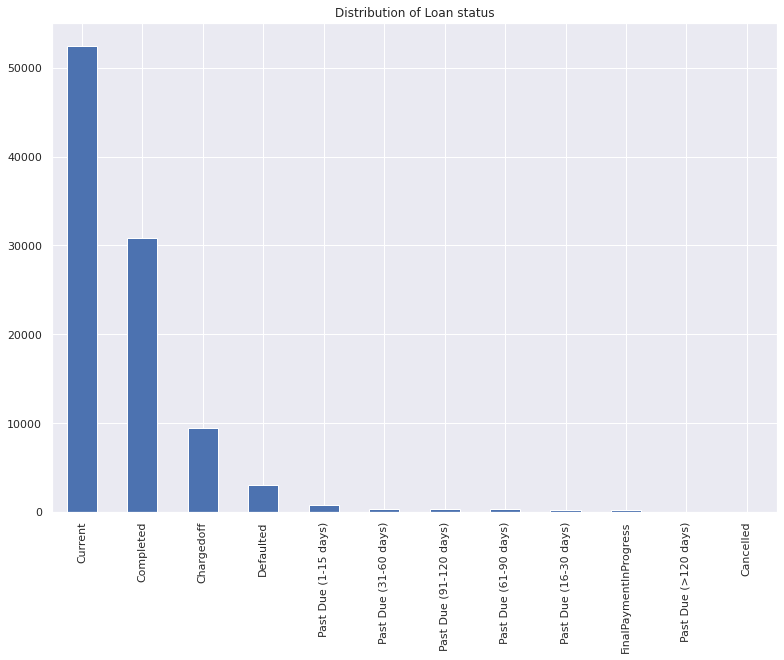

In [42]:
#count plot for Distribution of Loan status
plt.figure(figsize=(13,9))
loan_data['LoanStatus'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan status')

We see that most of the loans are current they are not closed yet. so plus the second highest loans are the ones which have been completed.

In [43]:
#Find out the frequency count for IncomeRange 
count=loan_data['IncomeRange'].value_counts()
count

$25,000-49,999    29875
$50,000-74,999    29354
$100,000+         16068
$75,000-99,999    16013
$1-24,999          6361
Not displayed       138
Not employed         77
Name: IncomeRange, dtype: int64

Text(0.5, 1.0, 'Distribution of Income Rnage')

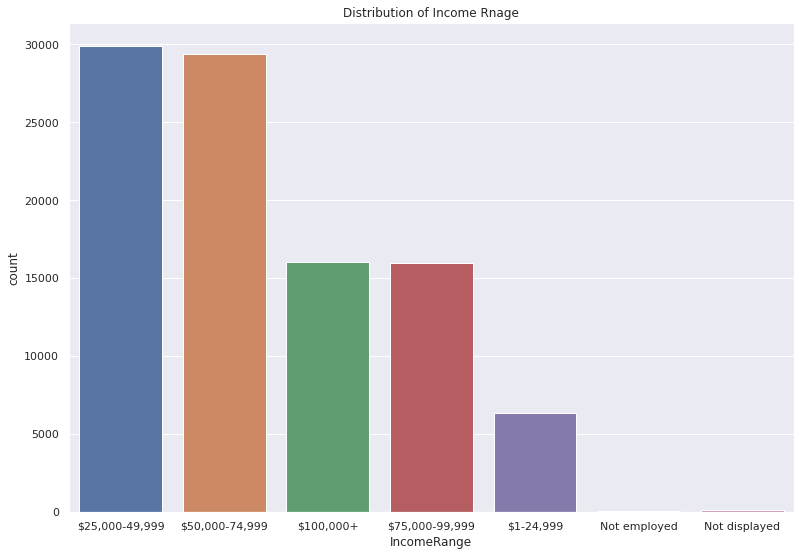

In [44]:
plt.figure(figsize=(13,9))
ax = sns.countplot(x="IncomeRange", data=loan_data)
plt.title('Distribution of Income Rnage')

Here we see that the people taking loans mostly have the range of their income is between 25-49000$ the greater their income the less loan they take. Poeple who do not work are almost not given loans.

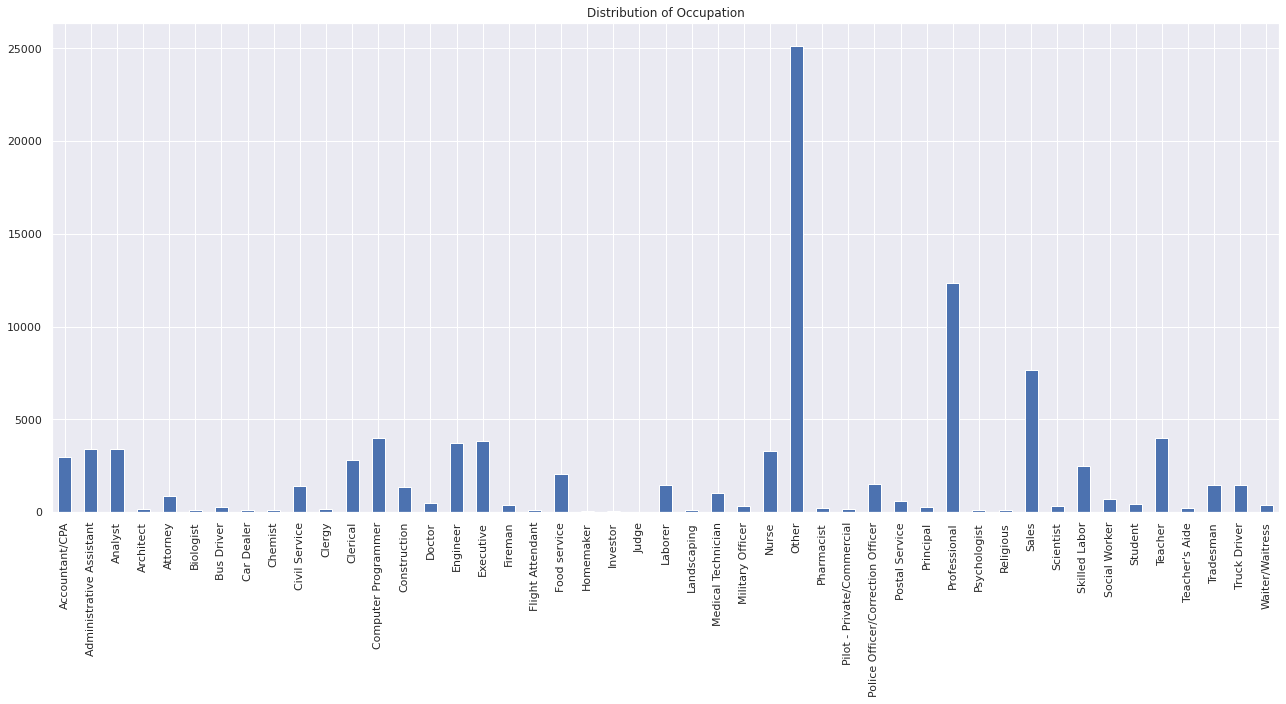

In [45]:
plt.figure(figsize=(22,9))
loan_data['Occupation'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Occupation')
plt.show()

This graph shows that the most occured occupations are professionals teacher, executives, computer programmers 

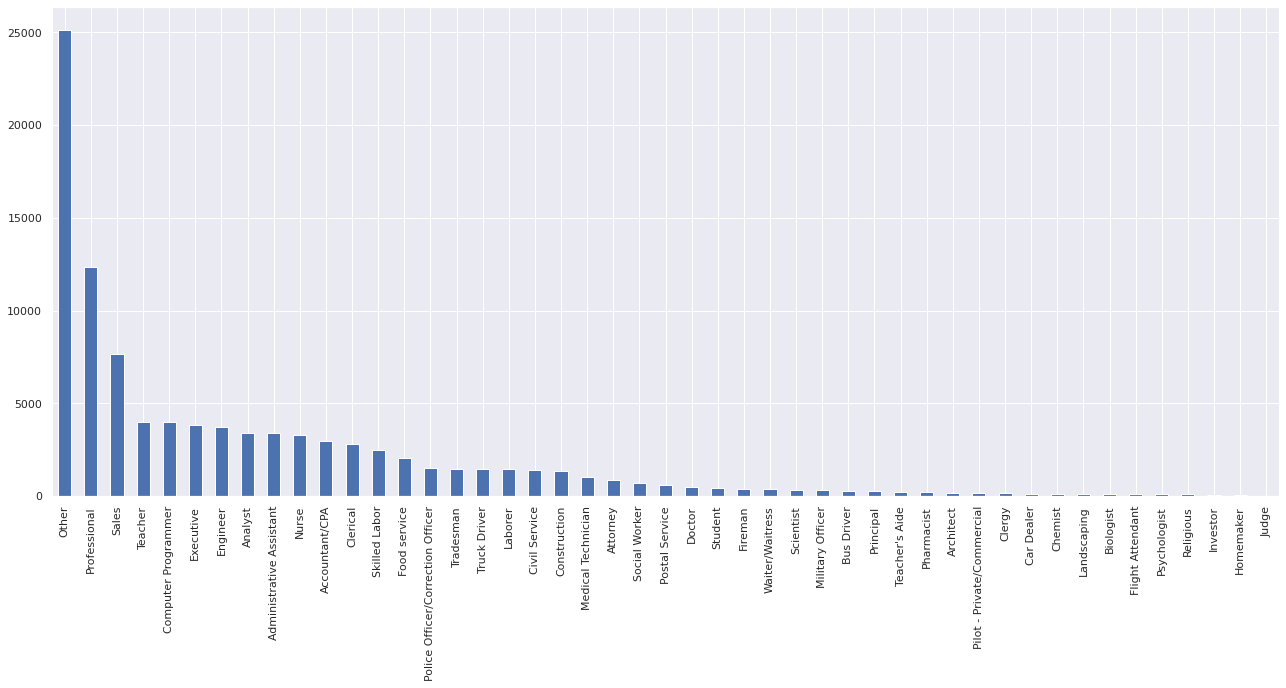

In [46]:
#after i want to see from the biggest value count to the smallest
plt.figure(figsize=(22,9))
(loan_data['Occupation'].value_counts().plot.bar())

Text(0.5, 1.0, 'Occupations with the lowest counts')

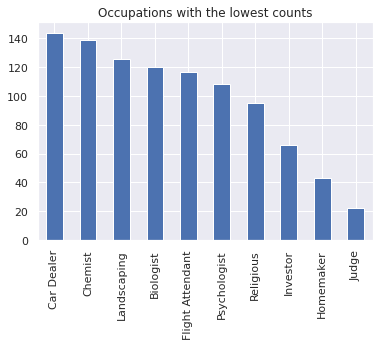

In [47]:
(loan_data['Occupation'].value_counts().tail(10).plot.bar())

plt.title('Occupations with the lowest counts')
#see the smallest counts of occupations

The least loans were taken by judges

In [48]:
loan_data['LoanOriginalAmount']

0          9425
1         10000
3         10000
4         15000
5         15000
          ...  
113932    10000
113933     2000
113934    10000
113935    15000
113936     2000
Name: LoanOriginalAmount, Length: 97886, dtype: int64

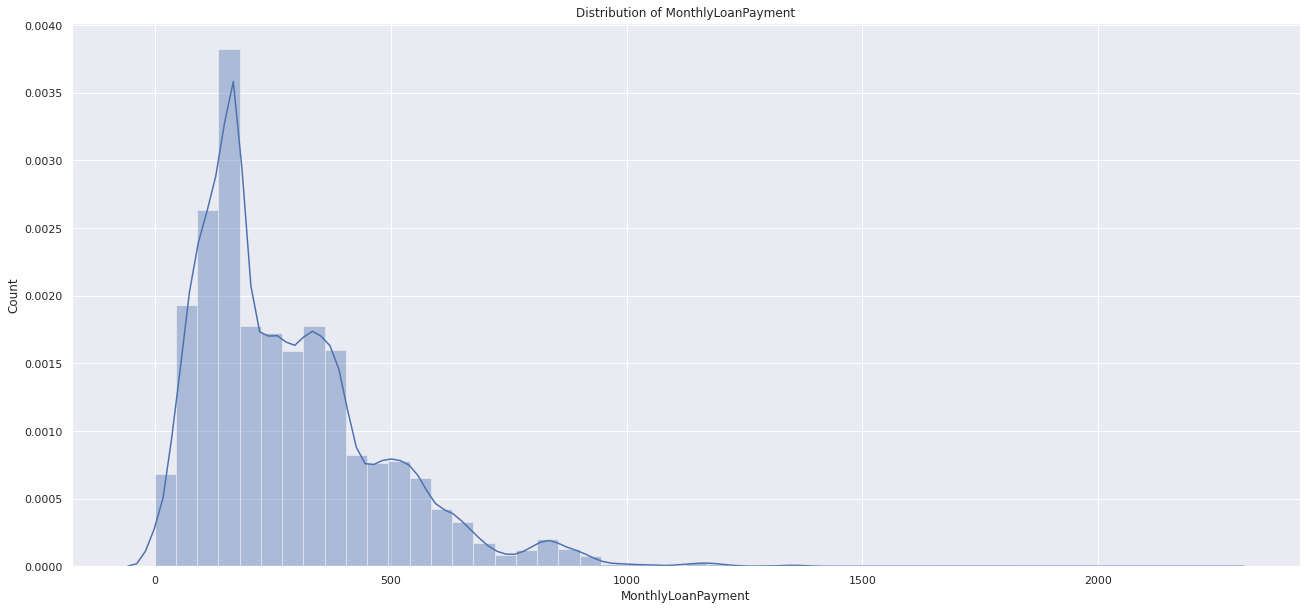

In [49]:
plt.figure(figsize=(22,10))
sns.distplot(loan_data["MonthlyLoanPayment"])
plt.title('Distribution of MonthlyLoanPayment')
plt.ylabel('Count')
plt.show()

We see that the distribution is normal and right skewed. It has one evident peak around 130. The range is between 0 to 1000.

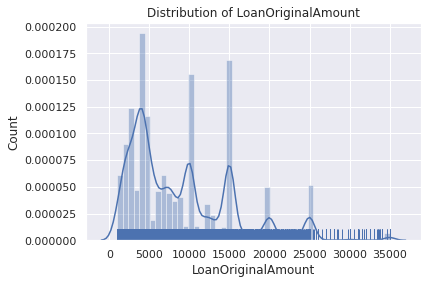

In [50]:
sns.distplot(loan_data['LoanOriginalAmount'], rug=True)
plt.title('Distribution of LoanOriginalAmount')
plt.ylabel('Count')
plt.show()

It has several peaks.

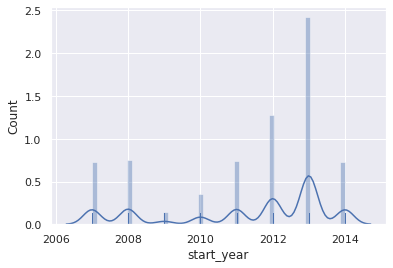

In [51]:
sns.distplot(loan_data['start_year'], rug=True)
plt.ylabel('Count')
plt.show()

The most loans were given in 2013. The loans amount were given more by more after each year till 2014 when they have

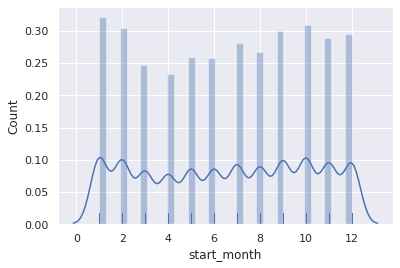

In [52]:
sns.distplot(loan_data['start_month'], rug=True)
plt.ylabel('Count')
plt.show()

The most loans were given in january and october and the least in April

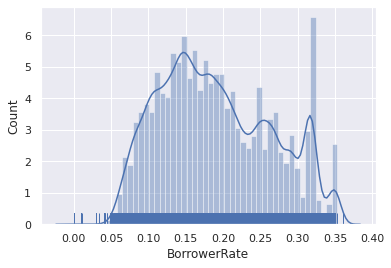

In [53]:
sns.distplot(loan_data['BorrowerRate'], rug=True)
plt.ylabel('Count')
plt.show()

This is a normal distribution we can see that the most values lie around the 0.15 and there is a peak between 0.30 to 0.34.



In [54]:
sizes = loan_data['ProsperRating (Alpha)'].value_counts()
sizes

Unknown    20343
C          16888
B          14629
A          13703
D          12820
E           8617
HR          5736
AA          5150
Name: ProsperRating (Alpha), dtype: int64

Distribution of ProsperRating (Alpha)

<Figure size 3600x1440 with 0 Axes>

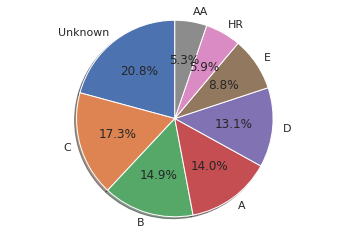

<Figure size 1440x1440 with 0 Axes>

In [55]:
plt.figure(figsize=(50,20))
count_alpha= loan_data["ProsperRating (Alpha)"].value_counts()
label=["Unknown","C","B","A","D","E","HR","AA"]
fig1, ax1 = plt.subplots()
plt.figure(figsize=(20,20))
ax1.pie(count_alpha, autopct='%1.1f%%',shadow=True, startangle=90,labels=label)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

What comes to the prosper rating we see that unkown rates have the most share. The second biggest proportion loans have been given a rate of 'C', and then 'B'. 'AA' has been given to very few loans only to 5.1%.

## Bivariate


In [56]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97886 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BorrowerAPR               97886 non-null  float64
 1   LoanStatus                97886 non-null  object 
 2   BorrowerRate              97886 non-null  float64
 3   AvailableBankcardCredit   97886 non-null  float64
 4   LoanOriginalAmount        97886 non-null  int64  
 5   Investors                 97886 non-null  int64  
 6   Occupation                97886 non-null  object 
 7   EmploymentStatus          97886 non-null  object 
 8   EmploymentStatusDuration  97886 non-null  float64
 9   ProsperRating (Alpha)     97886 non-null  object 
 10  Term                      97886 non-null  int64  
 11  Recommendations           97886 non-null  int64  
 12  IncomeRange               97886 non-null  object 
 13  MonthlyLoanPayment        97886 non-null  float64
 14  Close

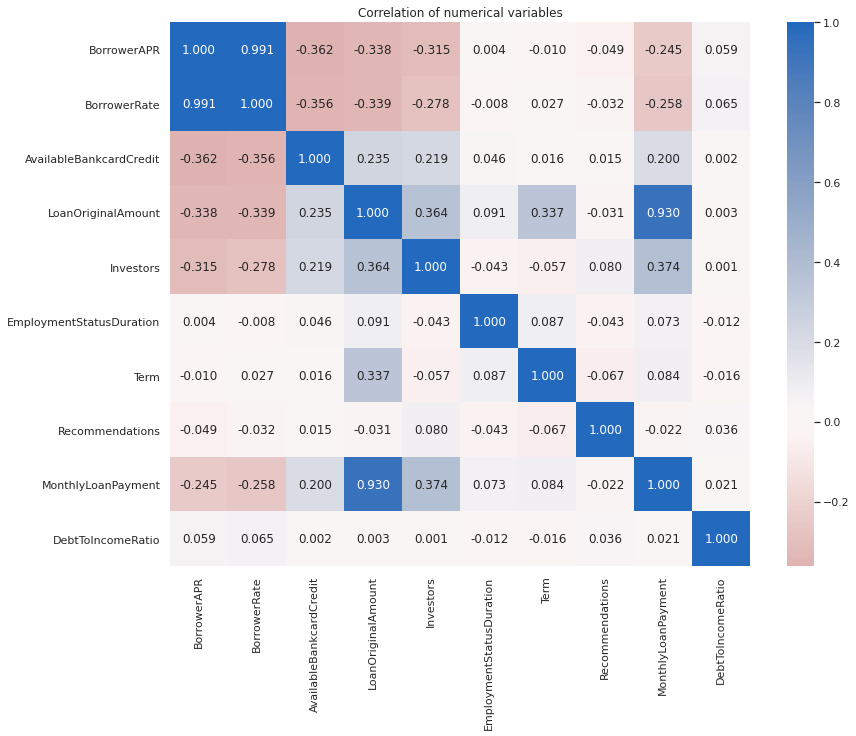

In [57]:
#correlation plot to find out the correlations between the variables
plt.figure(figsize = [13, 10])
sns.heatmap(loan_data.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation of numerical variables')
plt.show()

This shows that Loan original amount is correlated onegatively to borrower apr and postively to monthly loan payment and to investors


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


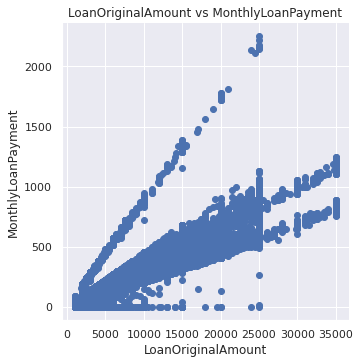

In [102]:
sns.FacetGrid(loan_data,size=5).map(plt.scatter,"LoanOriginalAmount",'MonthlyLoanPayment').add_legend()
plt.title('LoanOriginalAmount vs MonthlyLoanPayment')
plt.show()

Loan amount and montly loan payments are positievly related.

In [59]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97886 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BorrowerAPR               97886 non-null  float64
 1   LoanStatus                97886 non-null  object 
 2   BorrowerRate              97886 non-null  float64
 3   AvailableBankcardCredit   97886 non-null  float64
 4   LoanOriginalAmount        97886 non-null  int64  
 5   Investors                 97886 non-null  int64  
 6   Occupation                97886 non-null  object 
 7   EmploymentStatus          97886 non-null  object 
 8   EmploymentStatusDuration  97886 non-null  float64
 9   ProsperRating (Alpha)     97886 non-null  object 
 10  Term                      97886 non-null  int64  
 11  Recommendations           97886 non-null  int64  
 12  IncomeRange               97886 non-null  object 
 13  MonthlyLoanPayment        97886 non-null  float64
 14  Close

In [0]:
categories=['LoanStatus','Occupation','EmploymentStatus',' ProsperRating (Alpha)','IncomeRange']
numerical=['BorrowerAPR','BorrowerRate','AvailableBankcardCredit','LoanOriginalAmount','Investors',' EmploymentStatusDuration',
           'Term',' Recommendations','MonthlyLoanPayment','InvestmentFromFriendsAmount','InvestmentFromFriendsCount']

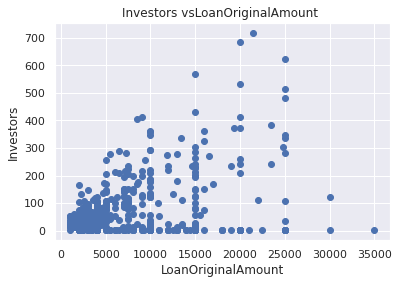

In [103]:
datalim=loan_data[:500]  # to have less data points
plt.scatter(datalim["LoanOriginalAmount"],datalim["Investors"])
plt.ylabel('Investors')
plt.xlabel('LoanOriginalAmount')
plt.title('Investors vsLoanOriginalAmount ')
plt.show()

 30000 and 35000 loan amounts are outliers other than that these two variables are positevely correlated though not so much

<Figure size 1008x1008 with 0 Axes>

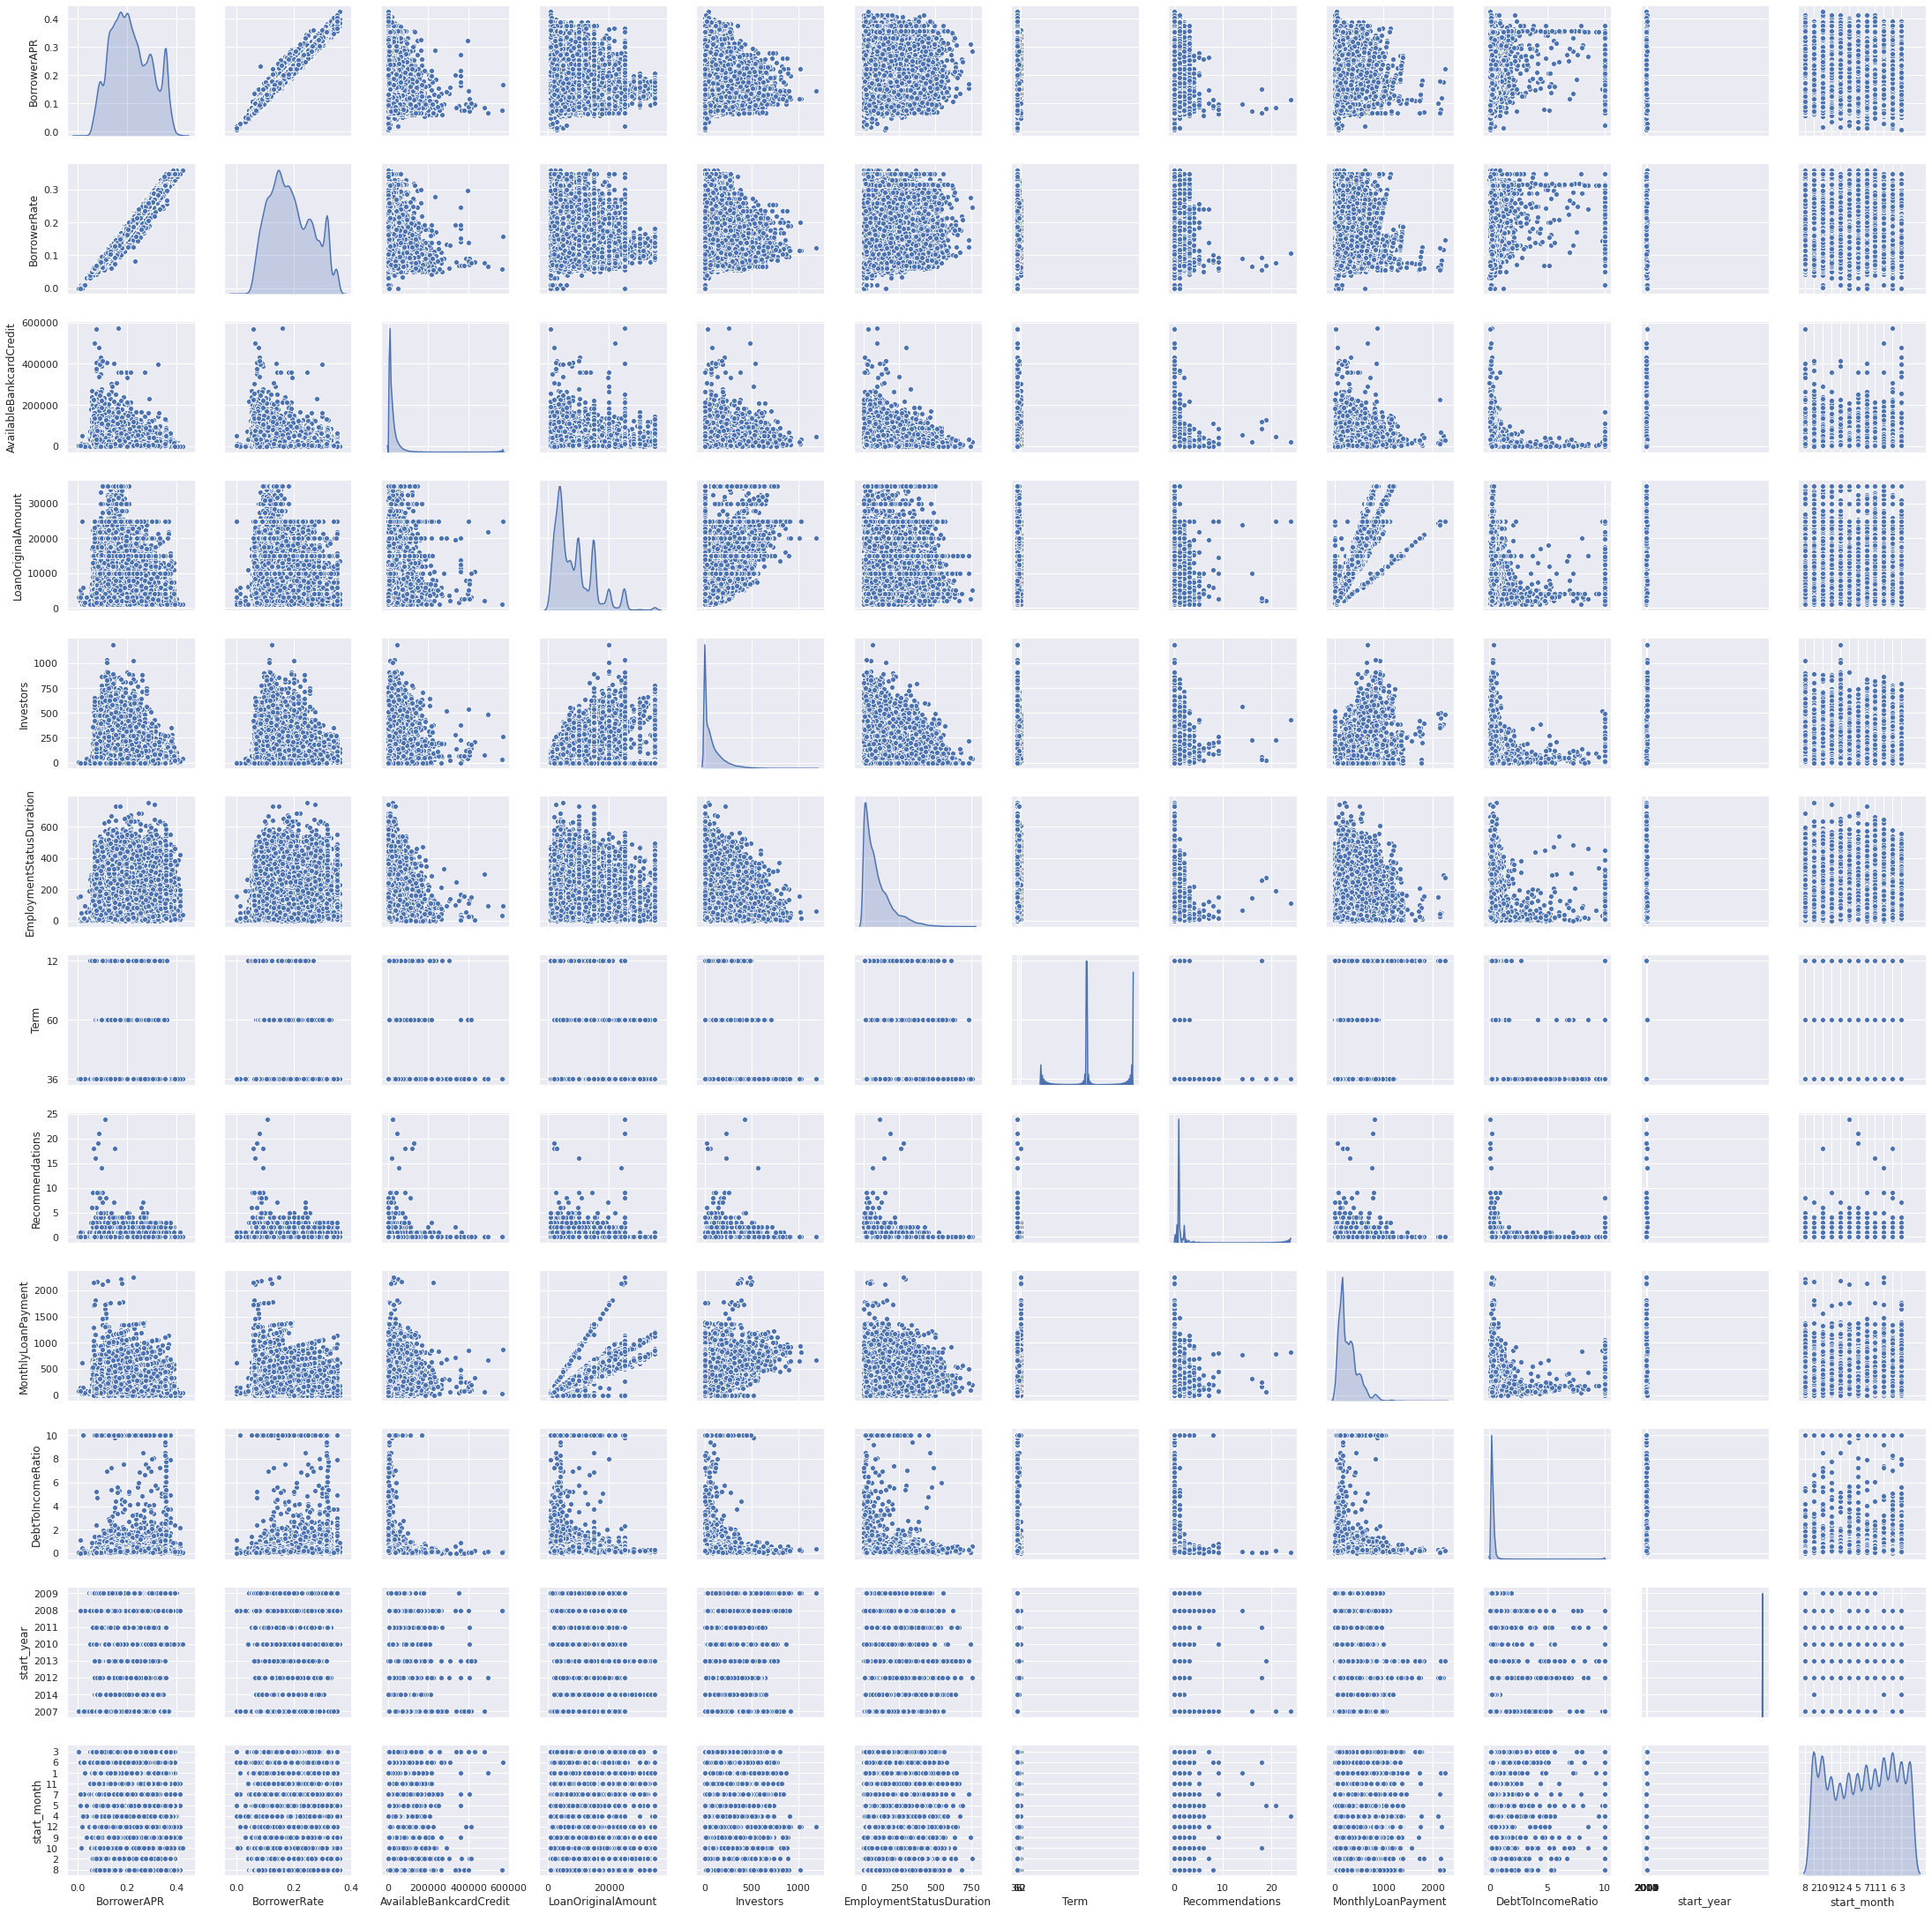

In [106]:
#cross plots
plt.figure(figsize=(14, 14))
sns.pairplot(loan_data, diag_kind='kde');

1. Employment Status duration vs Available bank credit. So the people with longer durtion of work have  less bank credit.
Investors vs Available bank credit. Having higher number of investors means  low bank credit.
2; Loan original amount vs start_year. The most loans have been in given in the years of 2014 and 2013. And the othe ryears have the similar loan amount.
3. Debt to income Ration vs Loan amount: When debt ratio is higher the loan amount given is lower. They are negatively correlated. 
4. Debt to income ratio vs investors. We see that these two variables are also negatively correlated and  higher the debt income ration the lower the investors.
5. Debt to income ratio vs status duration. These two variables are negatively correlated too. The higher the debt to income ratio the lower the employee status duration. So the people who have more working experience have less debts.
  


<Figure size 720x720 with 0 Axes>

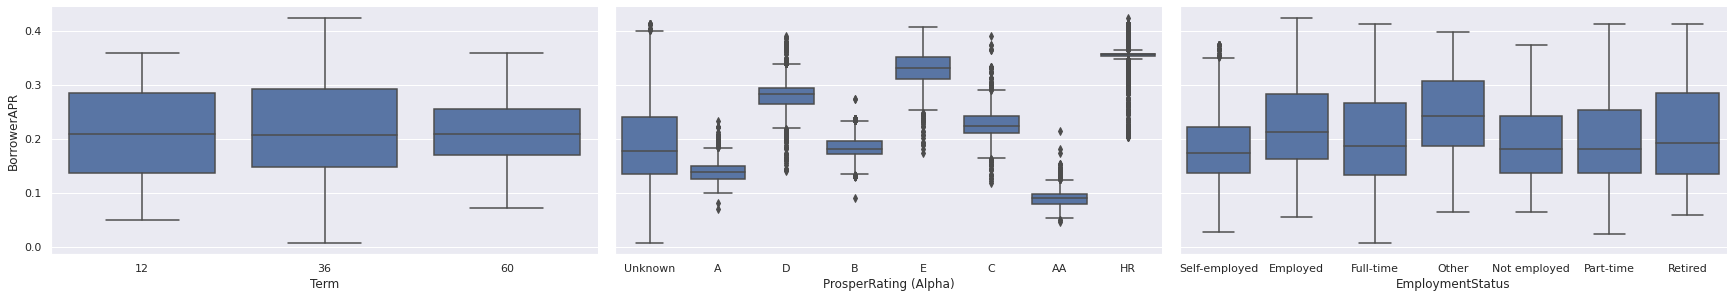

In [68]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_data, y_vars = ['BorrowerAPR'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 4, aspect = 2)
g.map(boxgrid)
plt.show();


1. While we compare APR with the term it is not chnaging as the medians of the box plots stay similar.
2. Employment vs Borrower APR: we can see that non employeed people have the highest borrower APR and full time and part time workers have the lowest Borrower APR;
3. Prosper rating vs Borrower APR: It can be seen that AA has the lowest APR so this means they are negatively correlated. The higher the Prosper Rating the lower the Borrower APR

<Figure size 720x720 with 0 Axes>

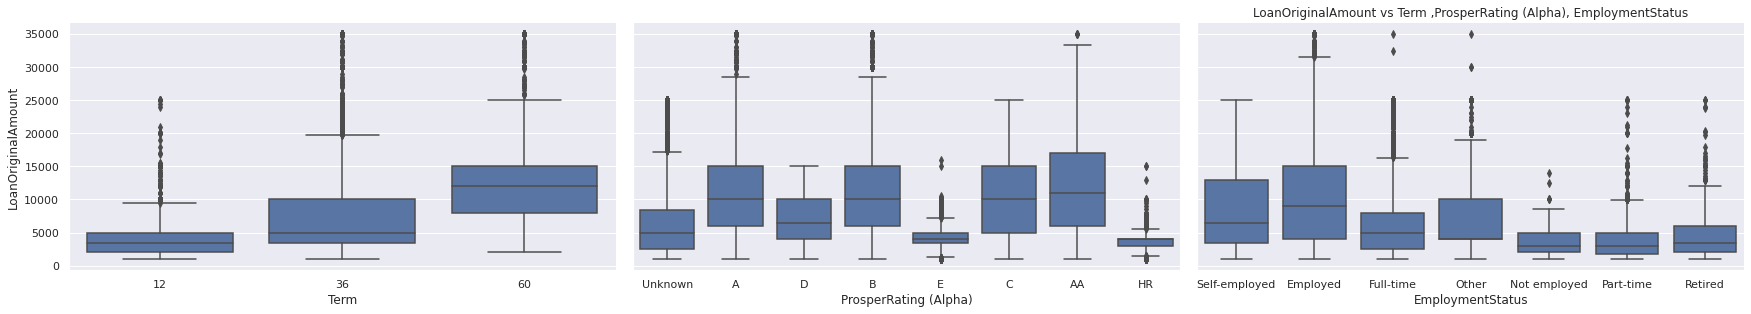

In [104]:
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_data, y_vars = ['LoanOriginalAmount'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 4, aspect = 2)
g.map(boxgrid)
plt.title('LoanOriginalAmount vs Term ,ProsperRating (Alpha), EmploymentStatus')
plt.show();

1. Term vs Loan amount: With the increase of term the loan amount also increases. They have some positive correlation
2. Loan AMount vs Prosper Rating:  For AA and A,C the highest loan aount is given, for E, HR, Unknown the least loan amount is given. This can mean they are correlated.
3. Most loan amount are given to employed people and the least is to non employed and part time workers

In [70]:
n = 10
most_occupation=loan_data['Occupation'].value_counts()[:n]
most_occupation 

Other                       25108
Professional                12339
Sales                        7676
Teacher                      3997
Computer Programmer          3994
Executive                    3859
Engineer                     3737
Analyst                      3390
Administrative Assistant     3379
Nurse                        3291
Name: Occupation, dtype: int64

In [71]:
loan_data['Occupation'].value_counts().head(10)

Other                       25108
Professional                12339
Sales                        7676
Teacher                      3997
Computer Programmer          3994
Executive                    3859
Engineer                     3737
Analyst                      3390
Administrative Assistant     3379
Nurse                        3291
Name: Occupation, dtype: int64

In [72]:
'''plt.figure(figsize = [10, 23])
sb.countplot(data = loan_data, x = loan_data['Occupation'].value_counts().head(10),y = 'LoanStatus', palette = 'Greens')
plt.xticks(rotation = 15);'''

"plt.figure(figsize = [10, 23])\nsb.countplot(data = loan_data, x = loan_data['Occupation'].value_counts().head(10),y = 'LoanStatus', palette = 'Greens')\nplt.xticks(rotation = 15);"

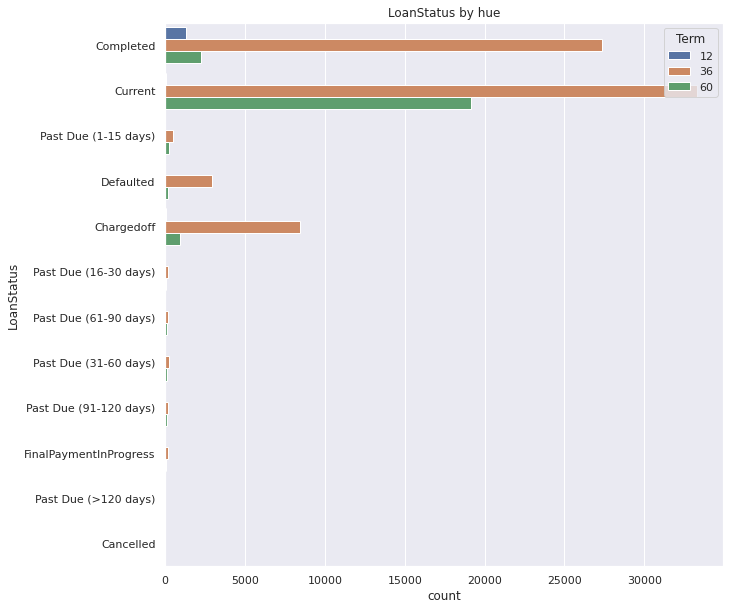

In [73]:
plt.figure(figsize=[10, 10])
sb.countplot(y='LoanStatus', hue='Term', data=loan_data)
plt.title('LoanStatus by hue')
plt.show()

So the loan  for 36 months has mostly current status and secondly it has completed status. 60 months loans are having mostly current status and the  second highest number of 60 months loans has been completed already.

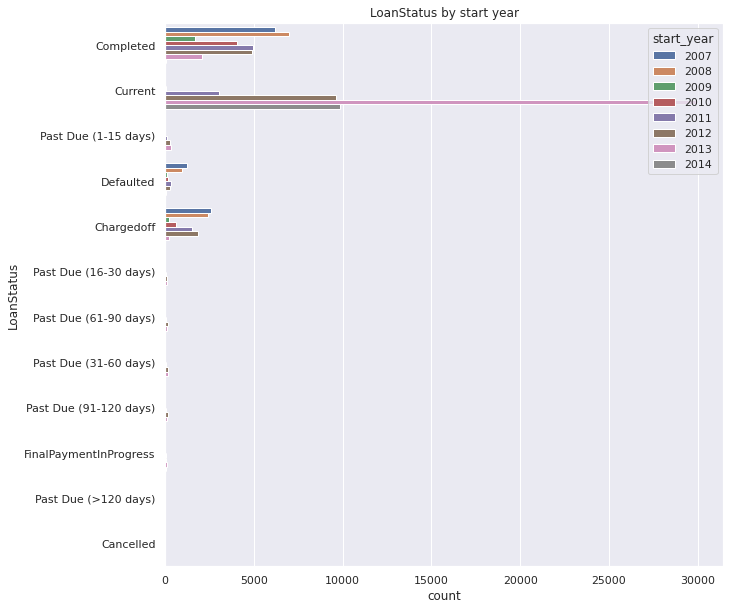

In [74]:
plt.figure(figsize=[10, 10])
sb.countplot(y='LoanStatus', hue='start_year', data=loan_data)
plt.title('LoanStatus by start year')
plt.show()

Current Loans have been mostly given in the year of the 2013.And for the completed loans they have been given mostly in 2008. 

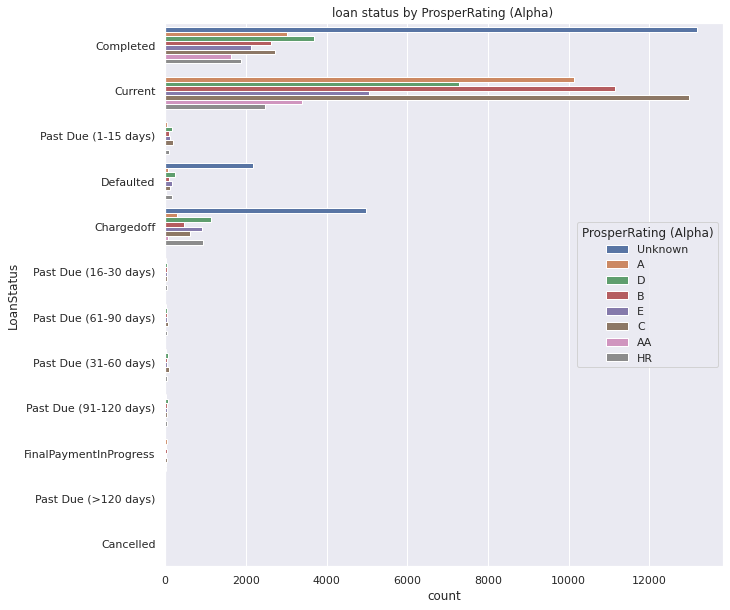

In [92]:
plt.figure(figsize=[10, 10])
sb.countplot(y='LoanStatus', hue='ProsperRating (Alpha)', data=loan_data)
plt.title('loan status by ProsperRating (Alpha) ')
plt.show()

Most of the current loans were given a C rating and secondly a B rating.For the completed loans most of the ratings are unknown, secondly they have been given D rating.

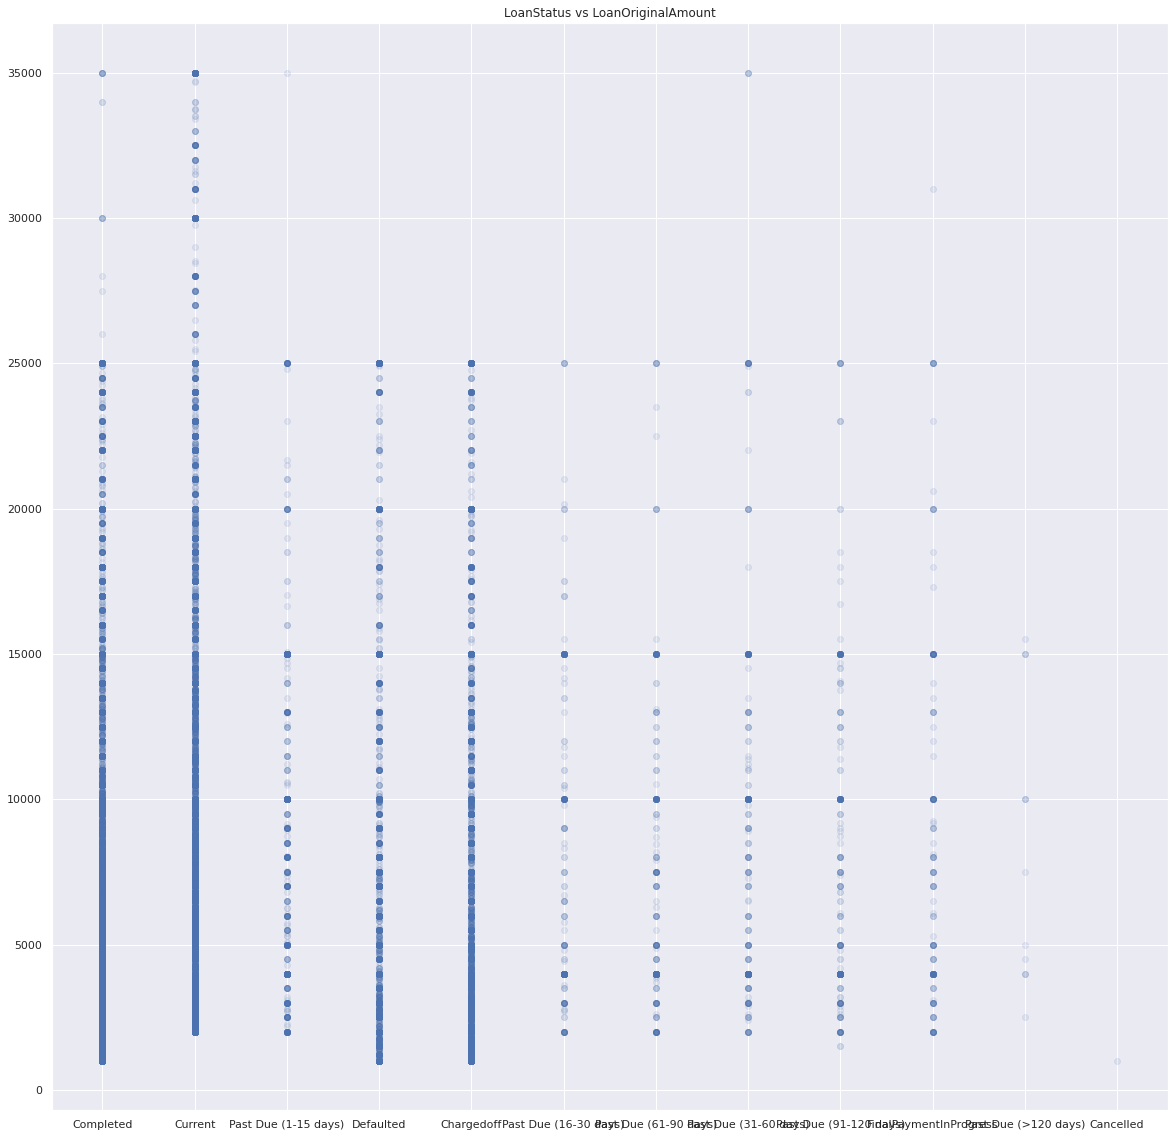

In [76]:
plt.figure(figsize = [20, 20])
plt.scatter(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', alpha = 1/10)
plt.title('LoanStatus vs LoanOriginalAmount')
plt.show()

Current has larger loan amount >35K.most of the loans which are defaulted have loan amount >25K; I assume that the current loan  given have higher amounts than the completed ones.

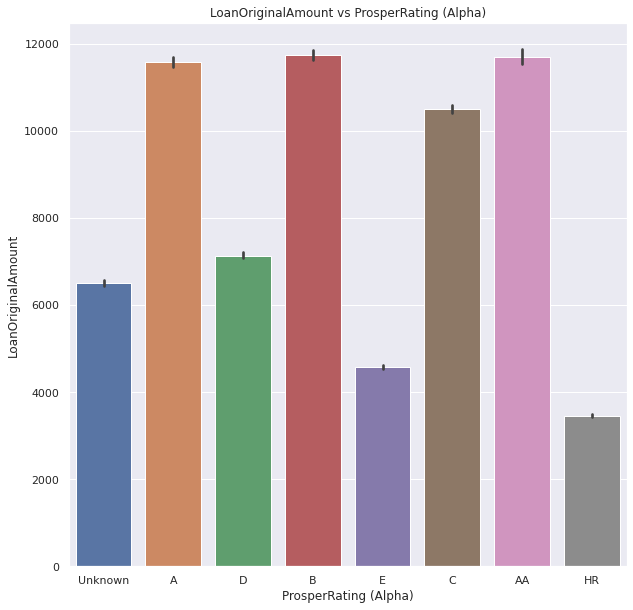

In [105]:
plt.figure(figsize=[10, 10])
sb.barplot(y='LoanOriginalAmount', x='ProsperRating (Alpha)', data=loan_data)
plt.title('LoanOriginalAmount vs ProsperRating (Alpha)')
plt.show()

The maximum loan amounts were given to A B and to AA. HR  and E have the lowest amount

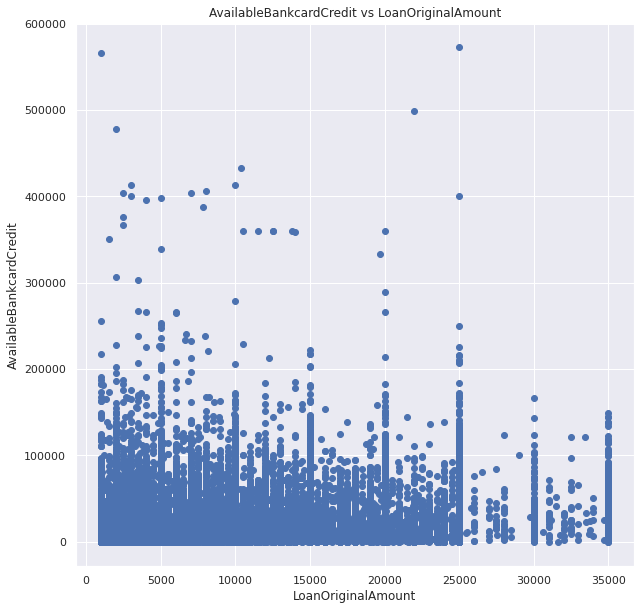

In [78]:
plt.figure(figsize = [10, 10])
plt.scatter(data = loan_data, y = 'AvailableBankcardCredit', x = 'LoanOriginalAmount')
plt.title('AvailableBankcardCredit vs LoanOriginalAmount')
plt.ylabel('AvailableBankcardCredit')
plt.xlabel('LoanOriginalAmount')
plt.show()

The people who have less credit amount take more loans. 

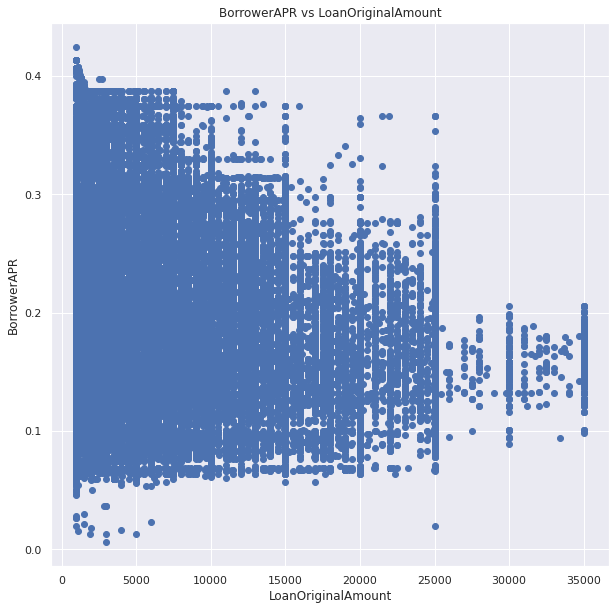

In [79]:
plt.figure(figsize = [10, 10])
plt.scatter(data = loan_data, y = 'BorrowerAPR', x = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.show()


The highest APR  is for the  lowest loan amount

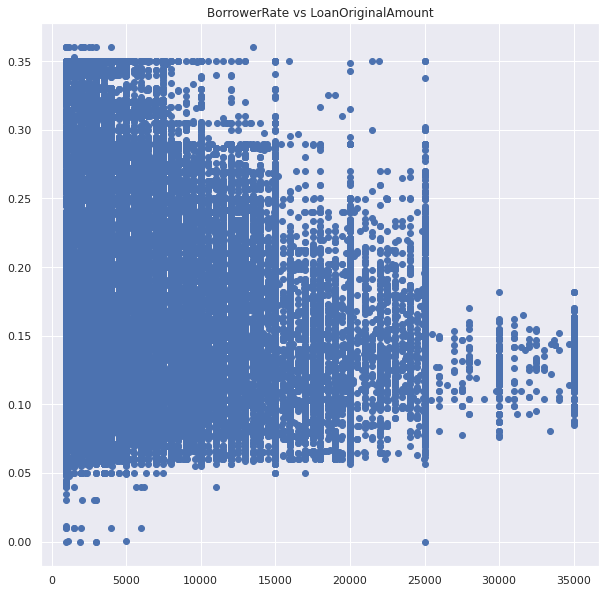

In [93]:
plt.figure(figsize = [10, 10])
plt.scatter(data = loan_data, y = 'BorrowerRate', x = 'LoanOriginalAmount')
plt.title('BorrowerRate vs LoanOriginalAmount')
plt.show()

There is a similar impact of the BorrowerRate and borrowerAPR on the loan amount. They both are higher when the loan amount is lower.


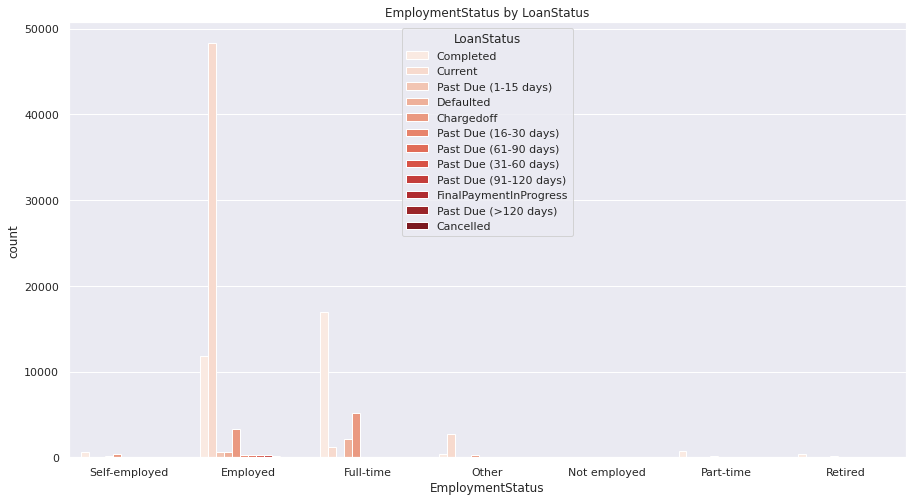

In [94]:

plt.figure(figsize = [15, 8])
# subplot 1: color vs cut
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Reds')
plt.title('EmploymentStatus by LoanStatus')
plt.show()

Most of the Emplyed people have current loan status and the second largest staus is the completed. So we can conclude that Employed people have less non paid loans. Most of the loans completed are by full_time eployees. the other were given less loans or not given at all.

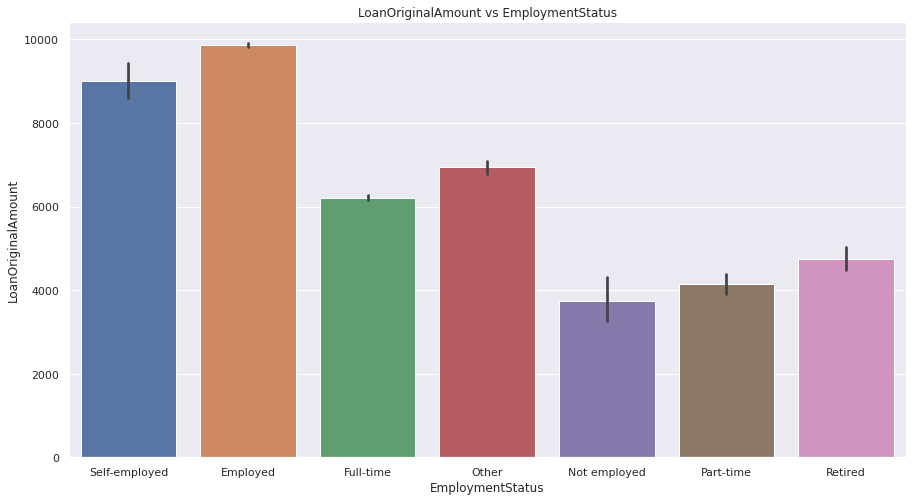

In [95]:

plt.figure(figsize = [15, 8])
# subplot 1: color vs cut
sb.barplot(data = loan_data, y = 'LoanOriginalAmount', x = 'EmploymentStatus')
plt.title('LoanOriginalAmount vs EmploymentStatus')
plt.show()

The people who are employed get the highest loan amounts. Self employeed people get the second highest loan amounts. Part time workers get the lowest loans still I am surprised that not employeed people get more loans than part-time workers.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. It is interesting to find out that the employed people get the highest loan amounts and the part time workers get the lowest loan amount. 
2. Loan Original amount is higher with the lowest APR this means they are negatively correlated. 
3. Borrower Rate is also negatively correlated to Loan AMount. LoanOriginalAmount' vs 'ProsperRating (Alpha) have positive correlations as the highest loan amount are given to people with the highest prosper Ratings.
4. Current has larger loan amount >35K.most of the loans which are defaulted have loan amount >25K;  The current loan given have higher amounts than the completed ones. 
5. And also the monthly loan payment is higher when the loan original amount is higher. They are defenetely positevely correlated.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. Most of the Emplyed people have current loan status and the second largest staus is the completed. So we can conclude that Employed people have less non paid loans. Most of the loans completed are by full_time eployees. the other were given less loans or not given at all.
2. Employment vs Borrower APR: we can see that non employeed people have the highest borrower APR and full time and part time workers have the lowest Borrower APR;
3. Prosper rating vs Borrower APR: It can be seen that AA has the lowest APR so this means they are negatively correlated. The higher the Prosper Rating the lower the Borrower APR.
4. Term VS APR: they are negatively correlated.
5. Debt to income ratio vs investors. they are negatively correlated
6. Debt to income ratio vs status duration. These two variables are negatively correlated too. The higher the debt to income ratio the lower the employee status duration. So the people who have more working experience have less debts.

## Multivariate Exploration

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


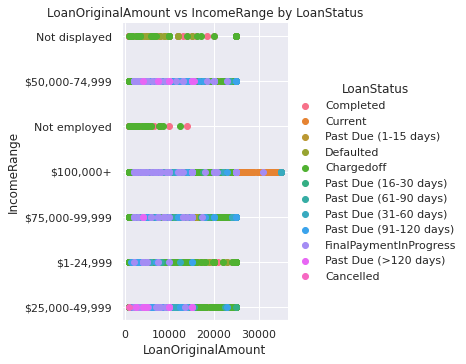

In [96]:
sns.FacetGrid(loan_data,hue="LoanStatus",size=5).map(plt.scatter,"LoanOriginalAmount",'IncomeRange').add_legend()
plt.title('LoanOriginalAmount vs IncomeRange by LoanStatus')
plt.show()

1. We can see here that the highest loan amount is given to people with an income range of 100K+. Inside it the loan amount bigger than 25K+ has the current status and under 25K they have mostly final payment progress status.
2. When the income range is between 25K-49K the loan amount given above 15K are chargedoff. They also have the most cancelled loan status below loan amount 10K;
3. The people with income of between 50K-74K mostly were GIVEN loans < 25K and mostly are not chargedoff.
4. The people with the range income between 75K-99K and are given < 15K loans are mostly in final payment process and above 15K they are mostly chargedoff or due.

In [84]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97886 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BorrowerAPR               97886 non-null  float64
 1   LoanStatus                97886 non-null  object 
 2   BorrowerRate              97886 non-null  float64
 3   AvailableBankcardCredit   97886 non-null  float64
 4   LoanOriginalAmount        97886 non-null  int64  
 5   Investors                 97886 non-null  int64  
 6   Occupation                97886 non-null  object 
 7   EmploymentStatus          97886 non-null  object 
 8   EmploymentStatusDuration  97886 non-null  float64
 9   ProsperRating (Alpha)     97886 non-null  object 
 10  Term                      97886 non-null  int64  
 11  Recommendations           97886 non-null  int64  
 12  IncomeRange               97886 non-null  object 
 13  MonthlyLoanPayment        97886 non-null  float64
 14  Close

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


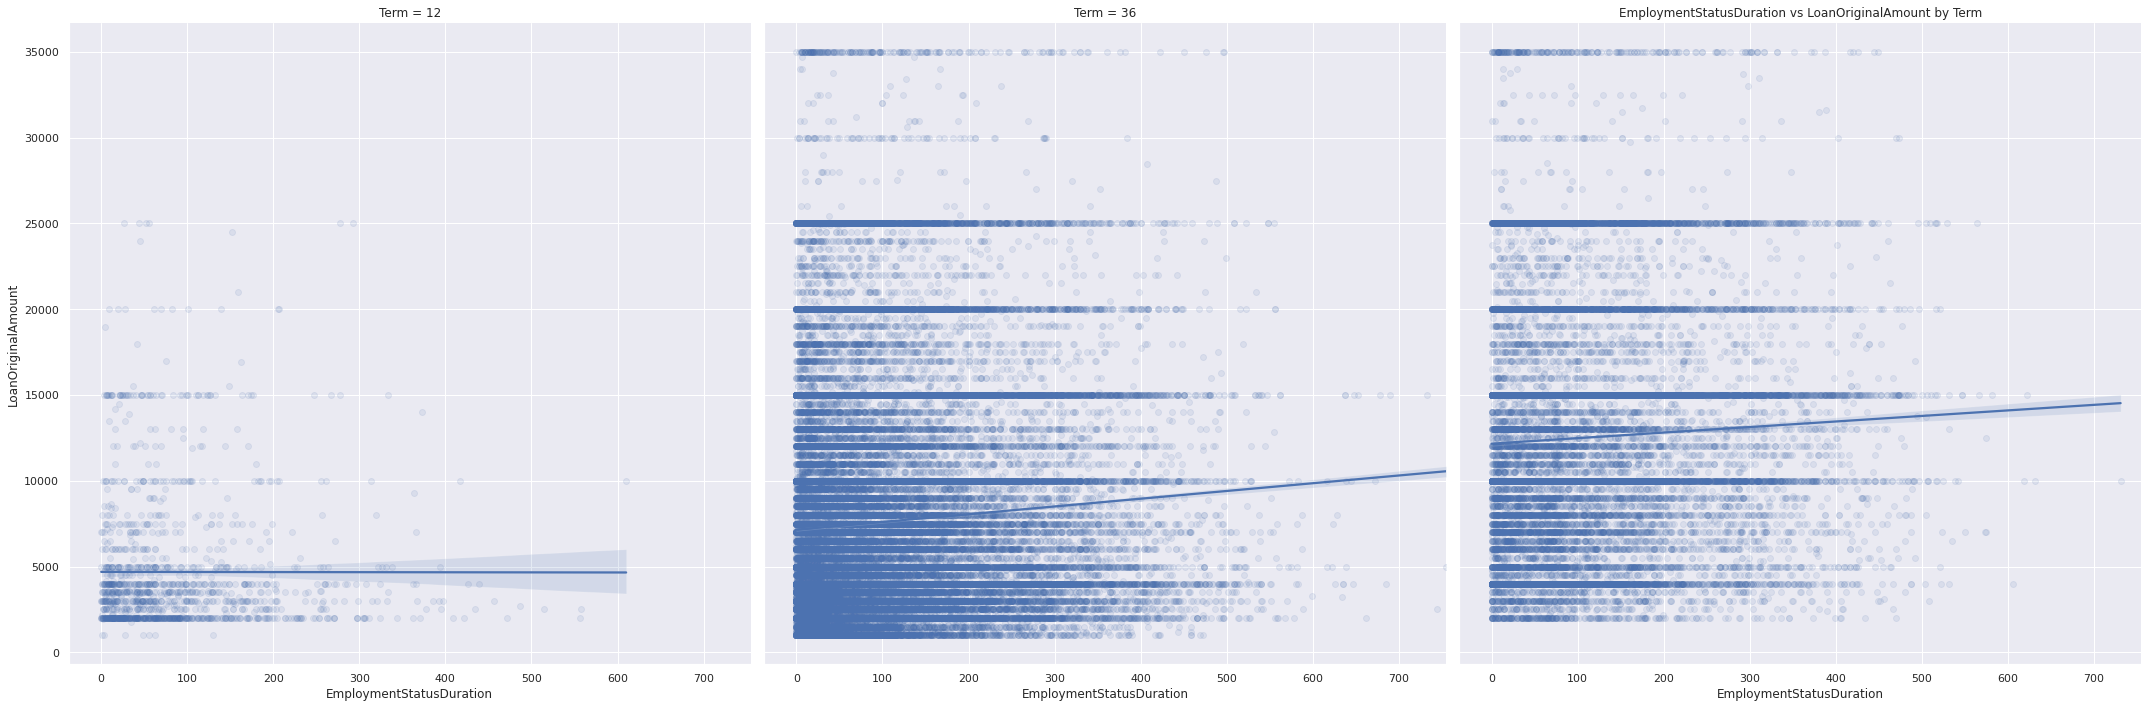

In [97]:
g = sb.FacetGrid(data = loan_data, col = 'Term',palette = 'colorblind',size=10)
g.map(sb.regplot, 'EmploymentStatusDuration', 'LoanOriginalAmount',x_jitter=0.04, scatter_kws={'alpha':0.1})
plt.title('EmploymentStatusDuration vs LoanOriginalAmount by Term')
plt.show()

1. For 12 month Employment duration does not matter for getting the loan.
2. For 36 and 60 months term there has a slightly positive correlation between employment duration and loan amount.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


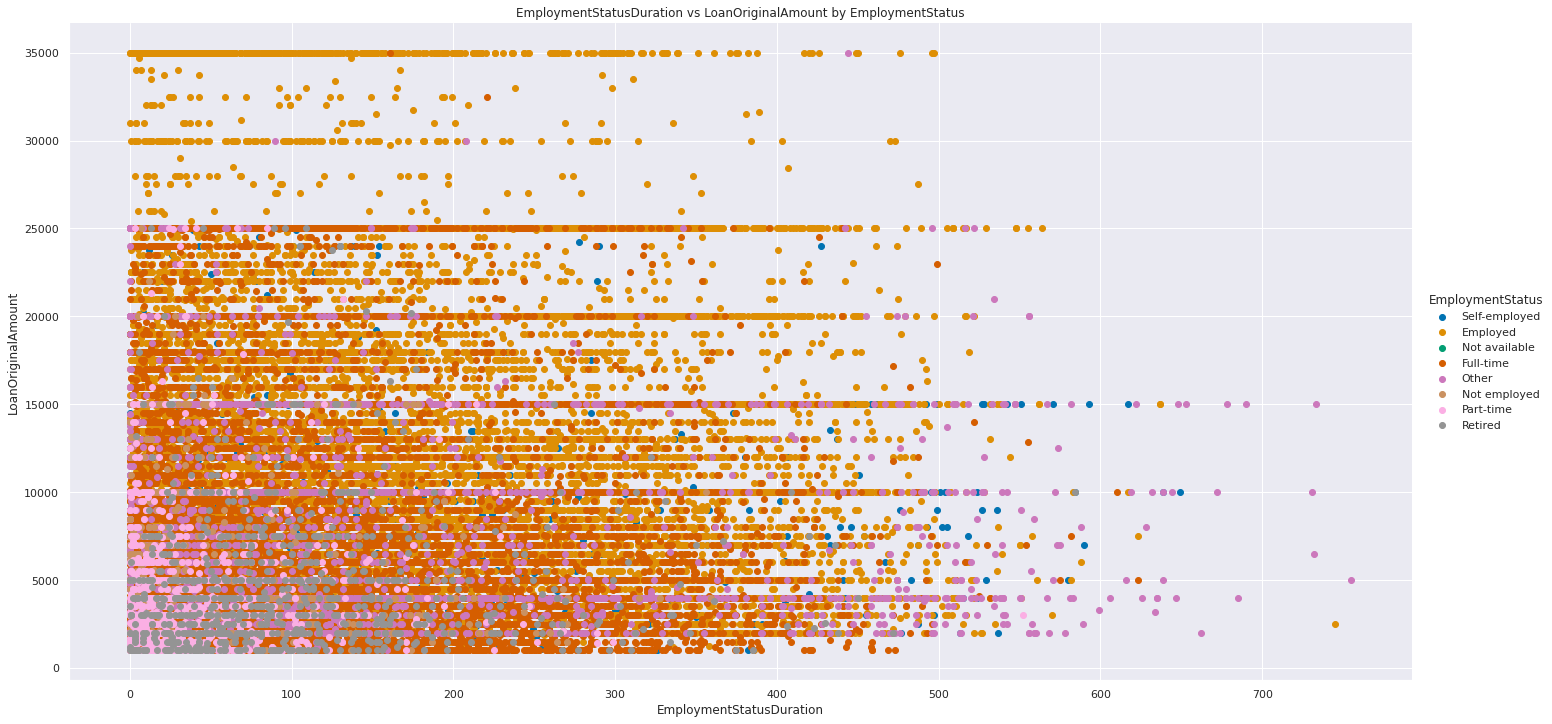

In [98]:
g = sb.FacetGrid(data = df, hue = 'EmploymentStatus', size = 10,
                 palette = 'colorblind',aspect=2)
g.map(plt.scatter, 'EmploymentStatusDuration', 'LoanOriginalAmount')
plt.title('EmploymentStatusDuration vs LoanOriginalAmount by EmploymentStatus')
g.add_legend()

1. It can be seen from this plot that retired pople have work up to 300 months and have taken a loan amount up to 10K.
2. Employeed people have taken the most loans, they work mostly up to 500 months and in the ration of loan amount from 25K-35K they have been given the most loans.
3. Part time workers have worked mostly up to 100 months and have been given mostly up to 10K loan amount.

In [0]:
loan_data['Term']=loan_data['Term'].apply(str)

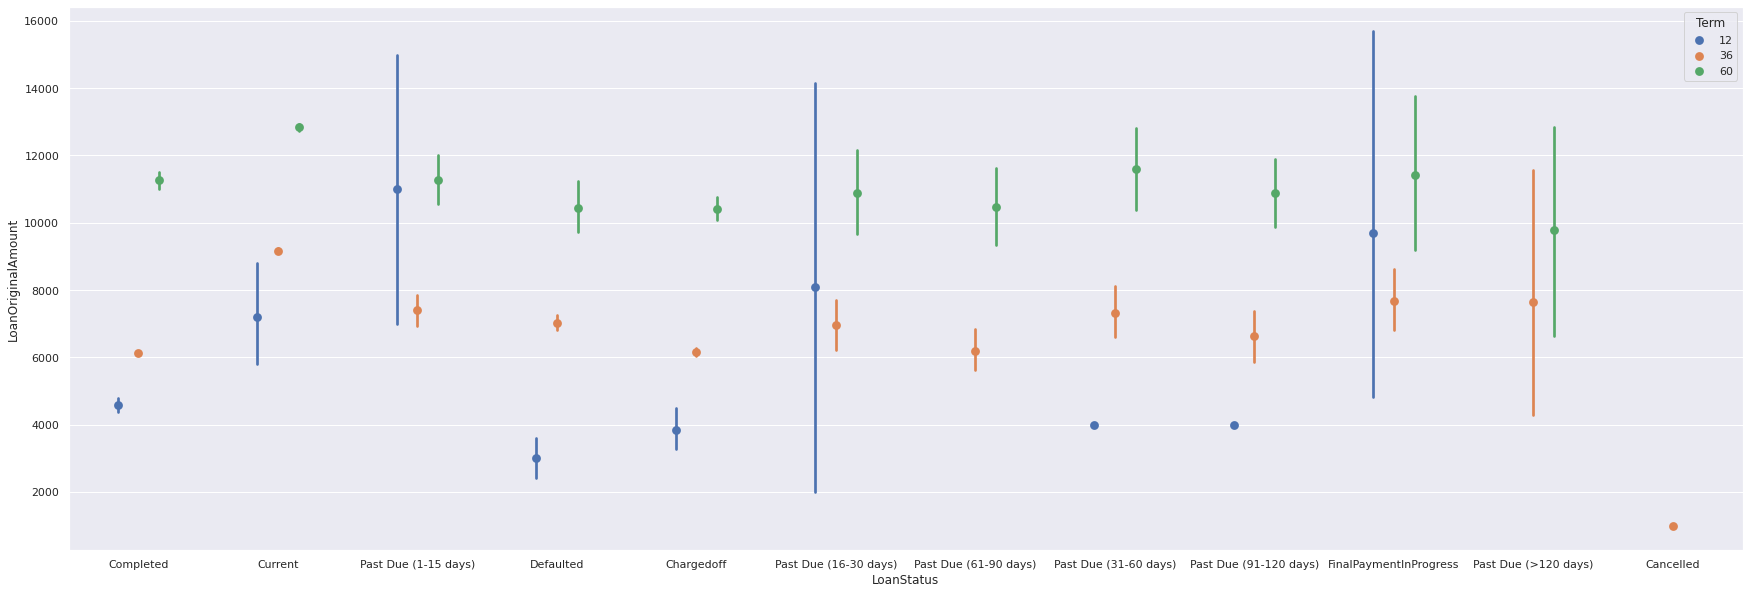

In [88]:
plt.figure(figsize = [30, 10])

ax = sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',
                  dodge = 0.3, linestyles = "")
plt.title('LoanStatus vs LoanOriginalAmount by Term')

1. As it can be seen the completed loans that have been give for 60 months had the loan amount >10K and the lowest amount was taken for the shortest period of time 12months.
2. The current loans for 12 months have the loan amount in the range of 6K-8.5K Again the highest amount to be paid are given with the largest periods.
3. Past due(1-15 days)  the largest loan amount taken is between 6.5K to 14.5 K and they were taken for 12 months.
4. Pople who did not pay the loan back for more than 2 years had a term of 60 and 36 months mostly.

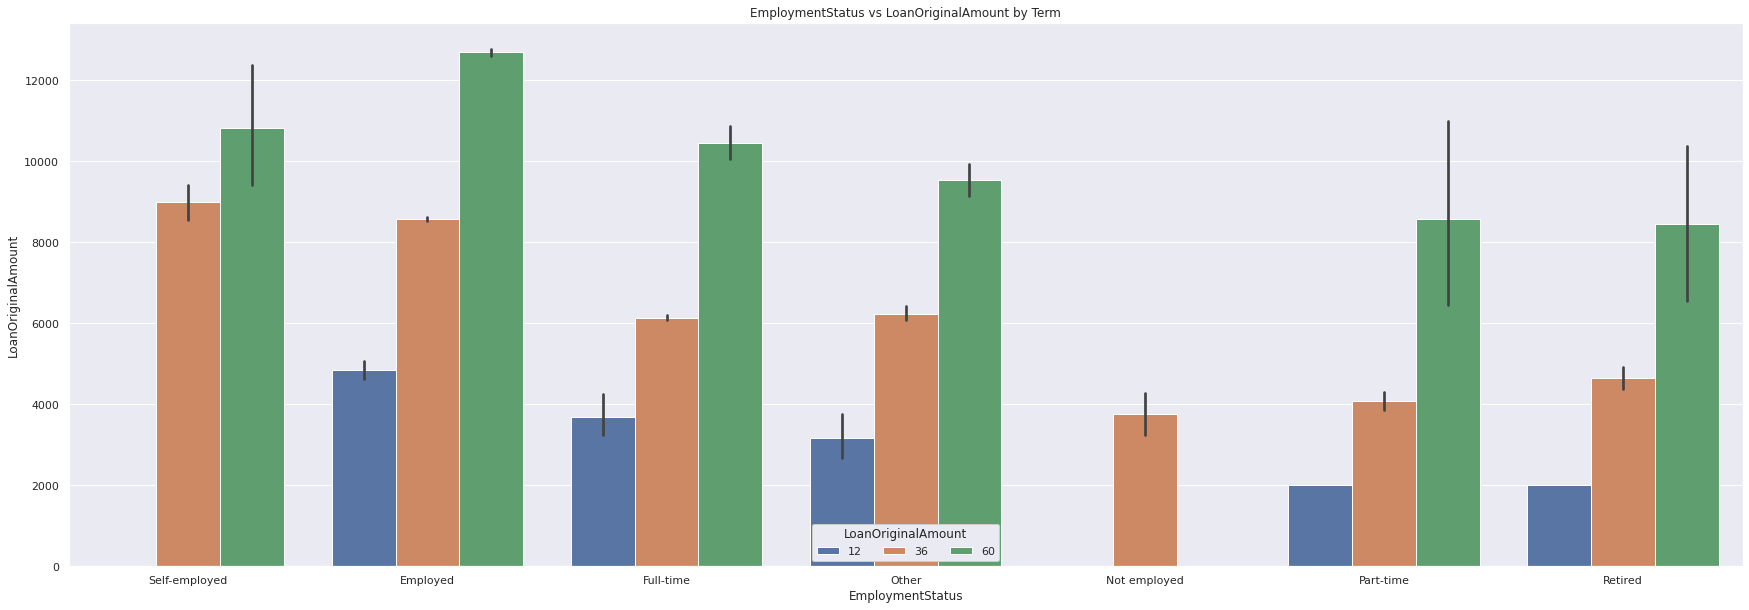

In [99]:
plt.figure(figsize = [30, 10])
ax = sb.barplot(data = loan_data, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'LoanOriginalAmount')
plt.title('EmploymentStatus vs LoanOriginalAmount by Term')
plt.show()

1. It is evident that the largest loan  amounts  are given for 60 months terms and for 12 months people are given less loan amount.
2. Self employed people never take a loan of 12 months.
3. Not epmloyeed people took a loan only for 36 month under 4000K

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. Income range strengthens loan original amount. So do the employment status and employment duration.
2. Loan Original amount increases with terms so the bigger the term the bigger the loan amount.


## Were there any interesting or surprising interactions between features?

1. EmploymentStatusDuration vs LoanOriginalAmount by Term: It is surprising that  for 12 month TERM Employment duration does not matter for getting the loan.
2. LoanStatus vs LoanOriginalAmount by Term is also interesting as the current loans for 12 months have the loan amount in the range of 6K-8.5K Again the highest amount to be paid are given with the largest periods.Pople who did not pay the loan back for more than 2 years had a term of 60 and 36 months mostly.


In [0]:
#loan_data.to_csv('clean_loan.csv')

In [91]:
'''from google.colab import files
files.download('clean_loan.csv')'''

"from google.colab import files\nfiles.download('clean_loan.csv')"